### ML - Task3 - Data Preprocessing

#### Objective:
#### The main objective of this project is to design and implement a robust data preprocessing system. 
#### By performing effective data preprocessing, the project aims to enhance the quality, reliability, and 
#### usefulness of the data for machine learning.

#### Key features to be fulfilled:

#### Data Exploration   
#### Data Cleaning
#### Data Analysis
#### Data Encoding
#### Feature Scaling  


In [165]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [167]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [168]:
df=pd.read_csv("Employee.csv")
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


### Data Exploration and cleaning

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [170]:
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [171]:
df.dtypes

Company     object
Age        float64
Salary     float64
Place       object
Country     object
Gender       int64
dtype: object

In [172]:
df.isnull().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [173]:
df.columns


Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')

In [174]:
df.drop_duplicates(inplace=True)
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [175]:
unique_values = {col: df[col].unique() for col in df.columns}
unique_counts = {col: len(df[col].unique()) for col in df.columns}

unique_values, unique_counts

({'Company': array(['TCS', 'Infosys', 'CTS', nan, 'Tata Consultancy Services',
         'Congnizant', 'Infosys Pvt Lmt'], dtype=object),
  'Age': array([20., 30., 35., 40., 23., nan, 34., 45., 18., 22., 32., 37., 50.,
         21., 46., 36., 26., 41., 24., 25., 43., 19., 38., 51., 31., 44.,
         33., 17.,  0., 54.]),
  'Salary': array([  nan, 2300., 3000., 4000., 5000., 6000., 7000., 8000., 9000.,
         1089., 1234., 3030., 3045., 3184., 4824., 5835., 7084., 8943.,
         8345., 9284., 9876., 2034., 7654., 2934., 4034., 5034., 8202.,
         9024., 4345., 6544., 6543., 3234., 4324., 5435., 5555., 8787.,
         3454., 5654., 5009., 5098., 3033.]),
  'Place': array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin',
         nan, 'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'],
        dtype=object),
  'Country': array(['India'], dtype=object),
  'Gender': array([0, 1], dtype=int64)},
 {'Company': 7,
  'Age': 30,
  'Salary': 41,
  'Place': 12,
  'Country': 1,

In [176]:
df['Company']=df['Company'].replace({'Tata Consultancy Services':'TCS','Infosys Pvt Lmt':'Infosys','Congnizant':'CTS'})
df.Company.unique()

array(['TCS', 'Infosys', 'CTS', nan], dtype=object)

In [177]:
df['Age'] = df['Age'].replace(0, np.nan)
df.Age.unique()

array([20., 30., 35., 40., 23., nan, 34., 45., 18., 22., 32., 37., 50.,
       21., 46., 36., 26., 41., 24., 25., 43., 19., 38., 51., 31., 44.,
       33., 17., 54.])

In [178]:
df.drop(columns="Country",inplace=True)
df

,Company,Age,Salary,Place,Gender
0,TCS,20.0,NaN,Chennai,0
1,Infosys,30.0,NaN,Mumbai,0
2,TCS,35.0,2300.0,Calcutta,0
3,Infosys,40.0,3000.0,Delhi,0
4,TCS,23.0,4000.0,Mumbai,0
...,...,...,...,...,...
142,Infosys,22.0,8202.0,Mumbai,0
143,TCS,33.0,9024.0,Calcutta,1
145,Infosys,44.0,4034.0,Delhi,1
146,TCS,33.0,5034.0,Mumbai,1


In [179]:
df['Age'].mean()

32.04132231404959

In [180]:
df['Age'].median()


33.0

In [181]:
df["Salary"].mean() 

5283.471074380165

In [182]:
df['Salary'].median()

5000.0

#### The mean and median values indicate that there is no outliers in the numerical value.So null values can be repalced by mean values.

In [183]:
df['Company'].mode()

0    TCS
Name: Company, dtype: object

In [184]:
df['Place'].mode()

0    Mumbai
Name: Place, dtype: object

In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True)


In [ ]:
df['Salary'].fillna(df['Salary'].mean(), inplace=True)

In [ ]:
df['Company'].fillna(df['Company'].mode()[0], inplace=True)

In [199]:
df['Place'].fillna(df['Place'].mode()[0], inplace=True)
df

,Company,Age,Salary,Place,Gender,Company_encoded,Place_encoded
0,TCS,20.0,5283.471074,Chennai,0,2,2
1,Infosys,30.0,5283.471074,Mumbai,0,1,6
2,TCS,35.0,2300.000000,Calcutta,0,2,1
3,Infosys,40.0,3000.000000,Delhi,0,1,4
4,TCS,23.0,4000.000000,Mumbai,0,2,6
...,...,...,...,...,...,...,...
142,Infosys,22.0,8202.000000,Mumbai,0,1,6
143,TCS,33.0,9024.000000,Calcutta,1,2,1
145,Infosys,44.0,4034.000000,Delhi,1,1,4
146,TCS,33.0,5034.000000,Mumbai,1,2,6


In [189]:
df.isnull().sum()

Company    0
Age        0
Salary     0
Place      0
Gender     0
dtype: int64

#### Data Analysis

In [190]:
df1= df[(df['Age'] > 40) & (df['Salary'] < 5000)]
df1

,Company,Age,Salary,Place,Gender
21,Infosys,50.0,3184.0,Delhi,0
32,Infosys,45.0,4034.0,Calcutta,0
39,Infosys,41.0,3000.0,Mumbai,0
50,Infosys,41.0,3000.0,Chennai,0
57,Infosys,51.0,3184.0,Hyderabad,0
68,Infosys,43.0,4034.0,Mumbai,0
75,Infosys,44.0,3000.0,Cochin,0
86,Infosys,41.0,3000.0,Delhi,0
93,Infosys,54.0,3184.0,Mumbai,0
104,Infosys,44.0,4034.0,Delhi,0


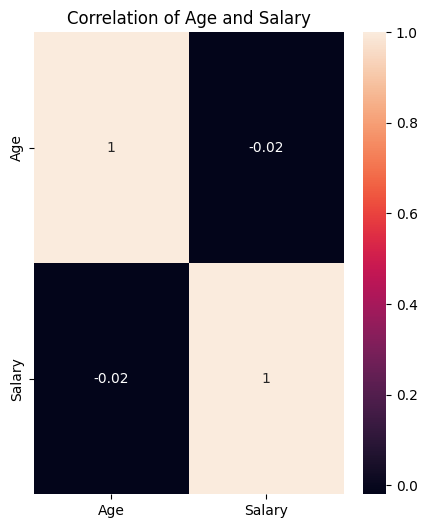

In [191]:
selected_columns = df[['Age', 'Salary']]
corr_matrix = selected_columns.corr()
plt.figure(figsize=(5, 6))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation of Age and Salary')
plt.show()

In [192]:
df2 = df.groupby("Place").size().reset_index(name="No_of_people")
df2 = df2.sort_values(by="No_of_people", ascending=False)
df2 = df2.reset_index(drop=True)
df2

,Place,No_of_people
0,Mumbai,48
1,Calcutta,32
2,Chennai,14
3,Delhi,14
4,Cochin,13
5,Hyderabad,8
6,Noida,8
7,Podicherry,3
8,Pune,2
9,Bhopal,1


C:\Users\Admin\AppData\Local\Temp\ipykernel_6616\1417511818.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Place', y='No_of_people', data=df2, palette='viridis')


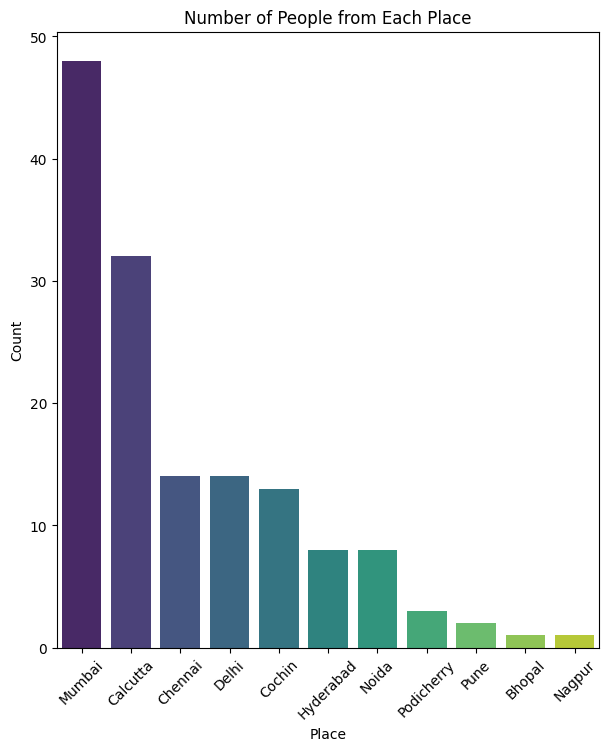

In [193]:
plt.figure(figsize=(7, 8))
sns.barplot(x='Place', y='No_of_people', data=df2, palette='viridis')
plt.title('Number of People from Each Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### From the barplot we can conclude that Mumbai has highest number of peoples then Bhopal and Nagpur has the least.

### Data Encoding

In [194]:
df_one_hot_encoded = pd.get_dummies(data = df1, columns = ["Company","Place"])
df_one_hot_encoded 

,Age,Salary,Gender,Company_CTS,Company_Infosys,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai
21,50.0,3184.0,0,False,True,False,False,False,True,False,False
32,45.0,4034.0,0,False,True,True,False,False,False,False,False
39,41.0,3000.0,0,False,True,False,False,False,False,False,True
50,41.0,3000.0,0,False,True,False,True,False,False,False,False
57,51.0,3184.0,0,False,True,False,False,False,False,True,False
68,43.0,4034.0,0,False,True,False,False,False,False,False,True
75,44.0,3000.0,0,False,True,False,False,True,False,False,False
86,41.0,3000.0,0,False,True,False,False,False,True,False,False
93,54.0,3184.0,0,False,True,False,False,False,False,False,True
104,44.0,4034.0,0,False,True,False,False,False,True,False,False


In [195]:
encoder = LabelEncoder()
for col in ['Company', 'Place']:
    df[col + '_encoded'] = encoder.fit_transform(df[col])
df.drop(['Company', 'Place'], axis=1)
df

,Company,Age,Salary,Place,Gender,Company_encoded,Place_encoded
0,TCS,20.0,5283.471074,Chennai,0,2,2
1,Infosys,30.0,5283.471074,Mumbai,0,1,6
2,TCS,35.0,2300.000000,Calcutta,0,2,1
3,Infosys,40.0,3000.000000,Delhi,0,1,4
4,TCS,23.0,4000.000000,Mumbai,0,2,6
...,...,...,...,...,...,...,...
142,Infosys,22.0,8202.000000,Mumbai,0,1,6
143,TCS,33.0,9024.000000,Calcutta,1,2,1
145,Infosys,44.0,4034.000000,Delhi,1,1,4
146,TCS,33.0,5034.000000,Mumbai,1,2,6


### Feature Scaling

In [197]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_one_hot_encoded)
df_scaled = pd.DataFrame(scaled_data, columns=df_one_hot_encoded.columns)
df_scaled

,Age,Salary,Gender,Company_CTS,Company_Infosys,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai
0,1.209416,-0.509064,-0.267261,-0.267261,0.267261,-0.392232,-0.267261,-0.392232,1.658312,-0.392232,-0.603023
1,-0.086387,1.392655,-0.267261,-0.267261,0.267261,2.549510,-0.267261,-0.392232,-0.603023,-0.392232,-0.603023
2,-1.123029,-0.920730,-0.267261,-0.267261,0.267261,-0.392232,-0.267261,-0.392232,-0.603023,-0.392232,1.658312
3,-1.123029,-0.920730,-0.267261,-0.267261,0.267261,-0.392232,3.741657,-0.392232,-0.603023,-0.392232,-0.603023
4,1.468576,-0.509064,-0.267261,-0.267261,0.267261,-0.392232,-0.267261,-0.392232,-0.603023,2.549510,-0.603023
5,-0.604708,1.392655,-0.267261,-0.267261,0.267261,-0.392232,-0.267261,-0.392232,-0.603023,-0.392232,1.658312
6,-0.345547,-0.920730,-0.267261,-0.267261,0.267261,-0.392232,-0.267261,2.549510,-0.603023,-0.392232,-0.603023
7,-1.123029,-0.920730,-0.267261,-0.267261,0.267261,-0.392232,-0.267261,-0.392232,1.658312,-0.392232,-0.603023
8,2.246058,-0.509064,-0.267261,-0.267261,0.267261,-0.392232,-0.267261,-0.392232,-0.603023,-0.392232,1.658312
9,-0.345547,1.392655,-0.267261,-0.267261,0.267261,-0.392232,-0.267261,-0.392232,1.658312,-0.392232,-0.603023


In [198]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_one_hot_encoded)
df_s_m = pd.DataFrame(scaled, columns=df_one_hot_encoded.columns)
df_s_m

,Age,Salary,Gender,Company_CTS,Company_Infosys,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai
0,0.692308,0.177950,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.307692,1.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.000000,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.769231,0.177950,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.153846,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.230769,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
8,1.000000,0.177950,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.230769,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
